In [ ]:
#  1.Exploration des données

In [ ]:
## Visualisation des variables

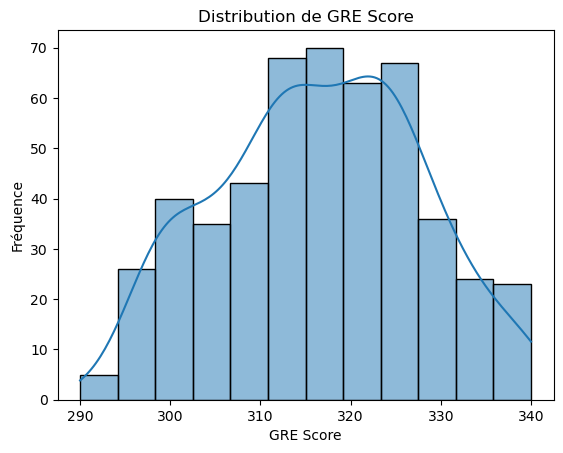

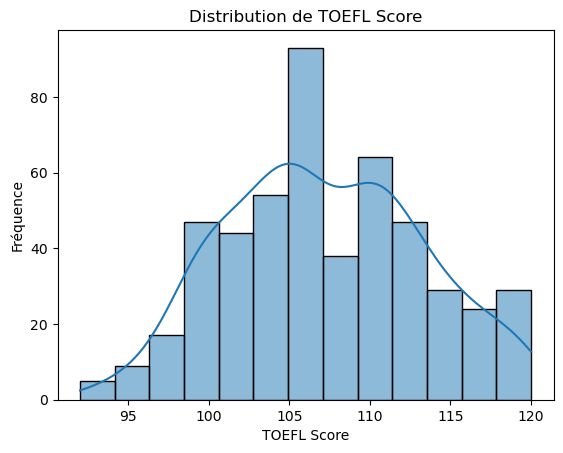

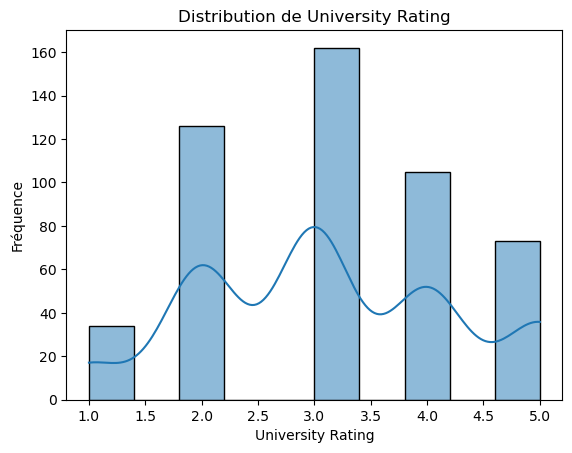

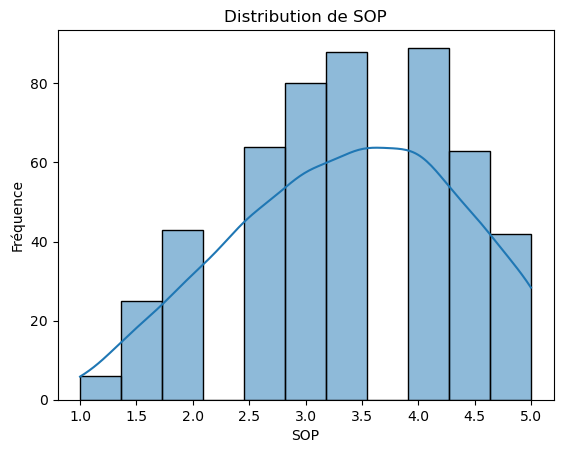

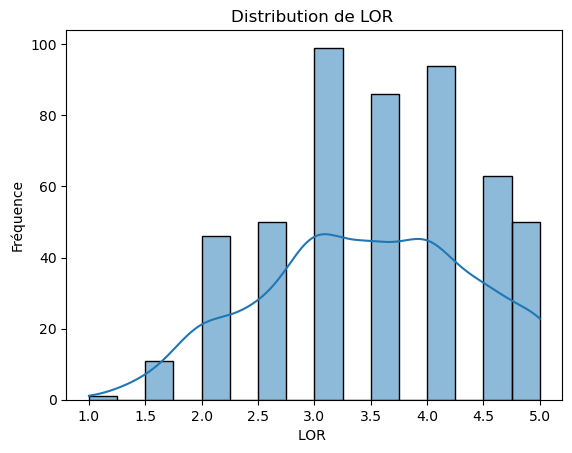

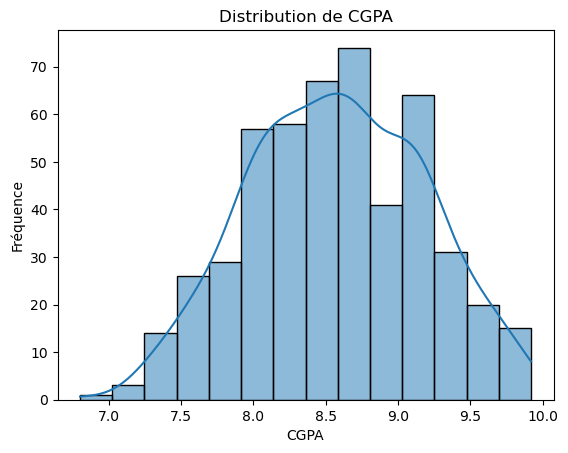

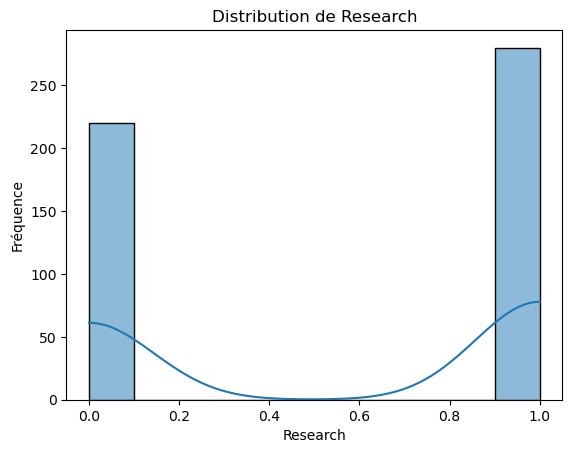

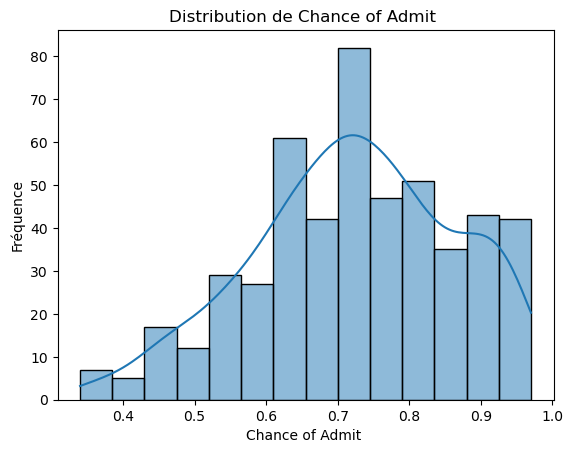

In [30]:
# Visualiser la distribution des variables (GRE, TOEFL, GPA, etc.).
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset admission_data.csv
df = pd.read_csv('admission_data.csv')

# Visualisation de la distribution des scores GRE, TOEFL et GPA
variables = ['GRE Score', 'TOEFL Score' ,'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']  # Assurez-vous que ces noms de colonnes correspondent à ceux dans le dataset

for var in variables:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()


In [ ]:
## Boxplot pour identifier les valeurs extrêmes

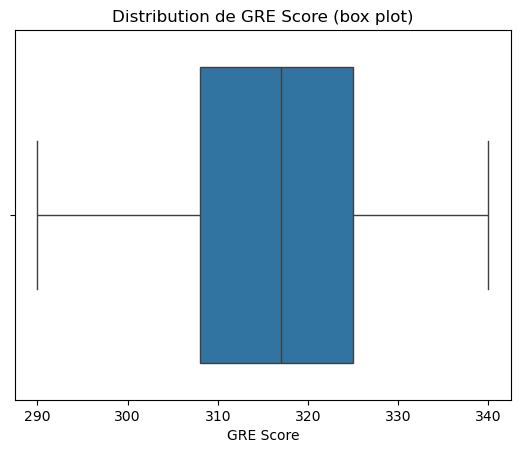

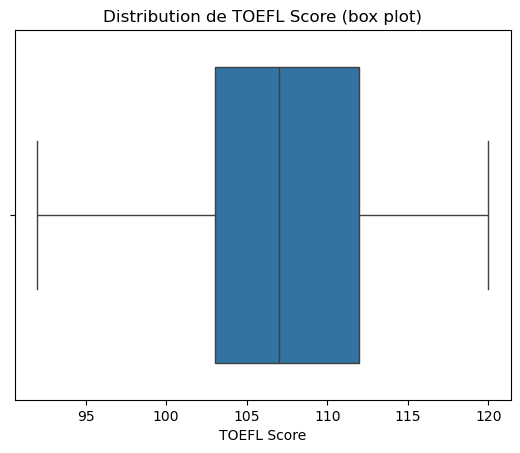

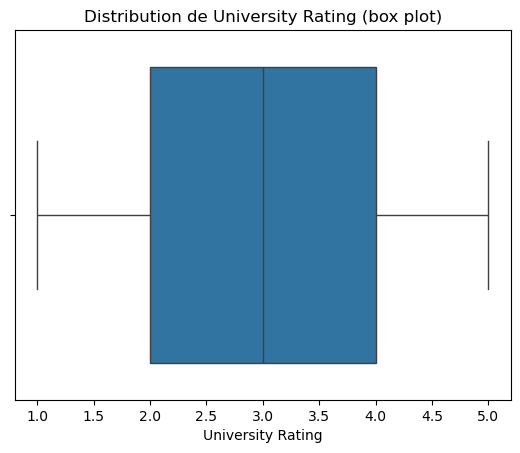

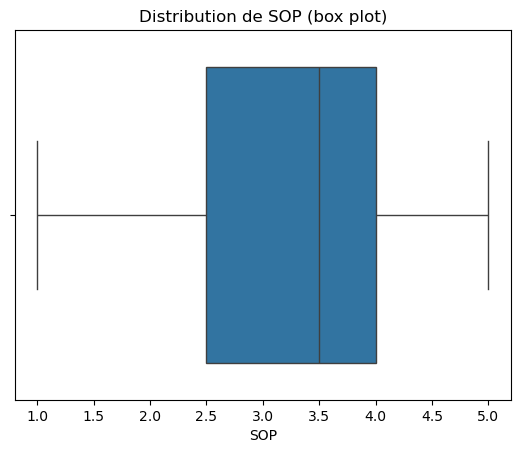

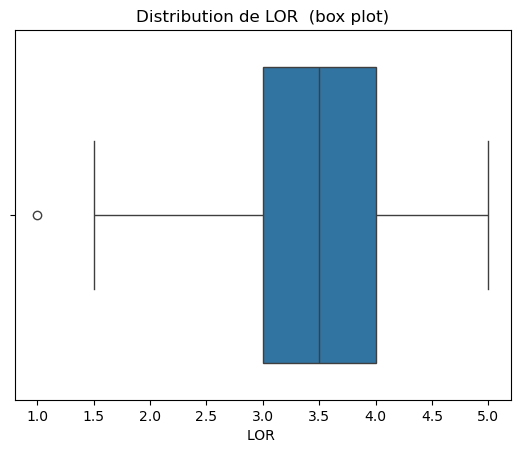

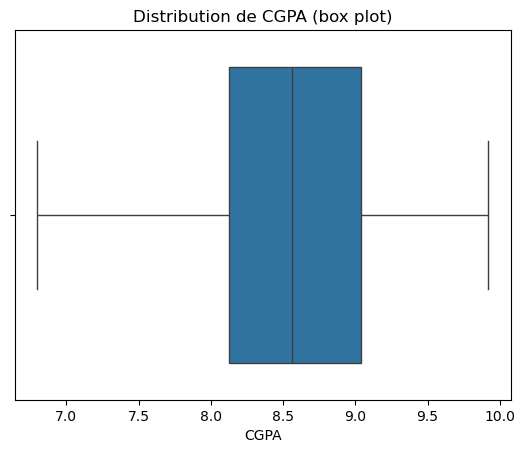

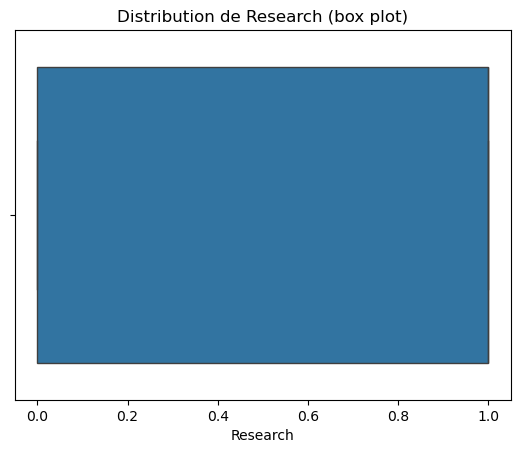

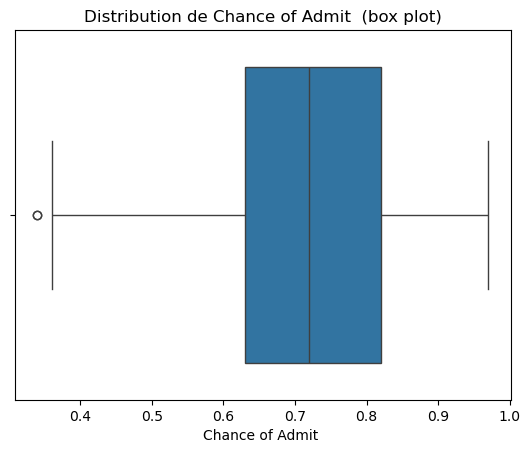

In [32]:
for var in variables:
    sns.boxplot(x=df[var])
    plt.title(f'Distribution de {var} (box plot)')
    plt.show()


In [ ]:
## Étudier la corrélation entre les variables et la variable cible (Chance of Admit).

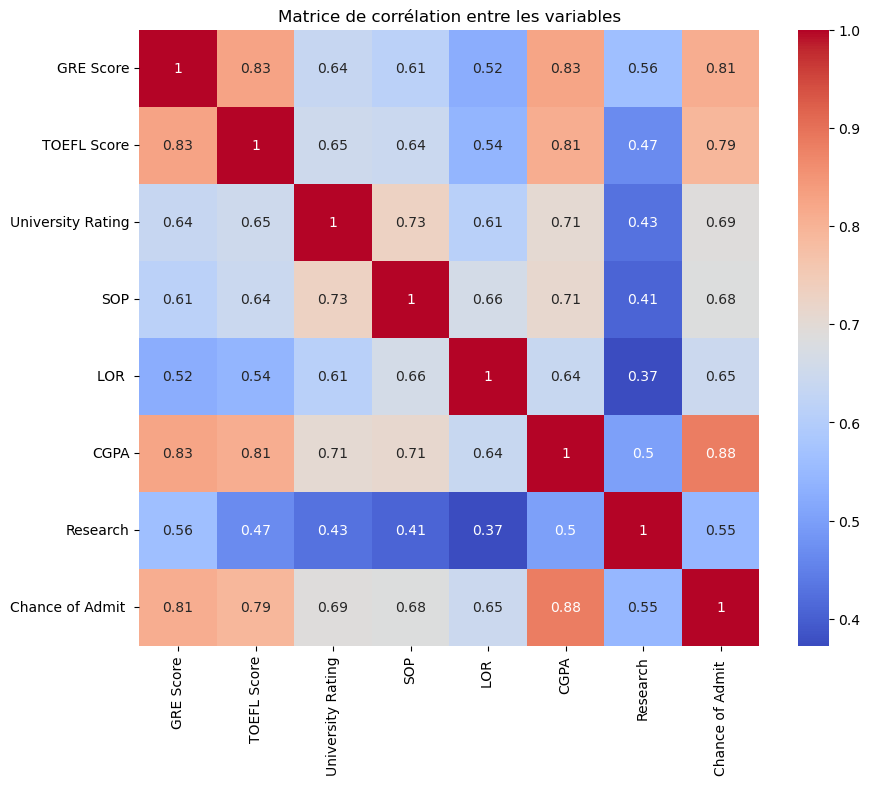

In [34]:
# Matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables')
plt.show()


In [ ]:
# 2. Prétraitement des données 

In [ ]:
## Appliquer la standardisation des variables et visualiser son effet.

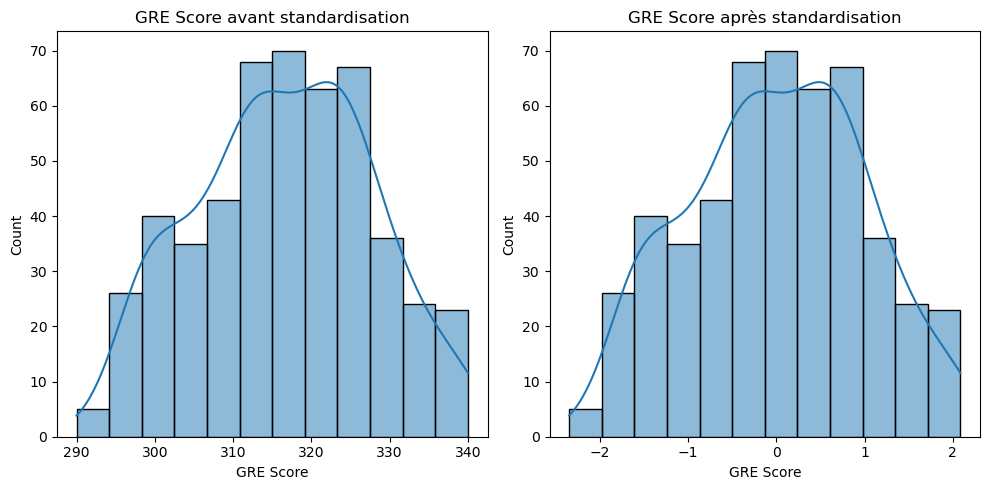

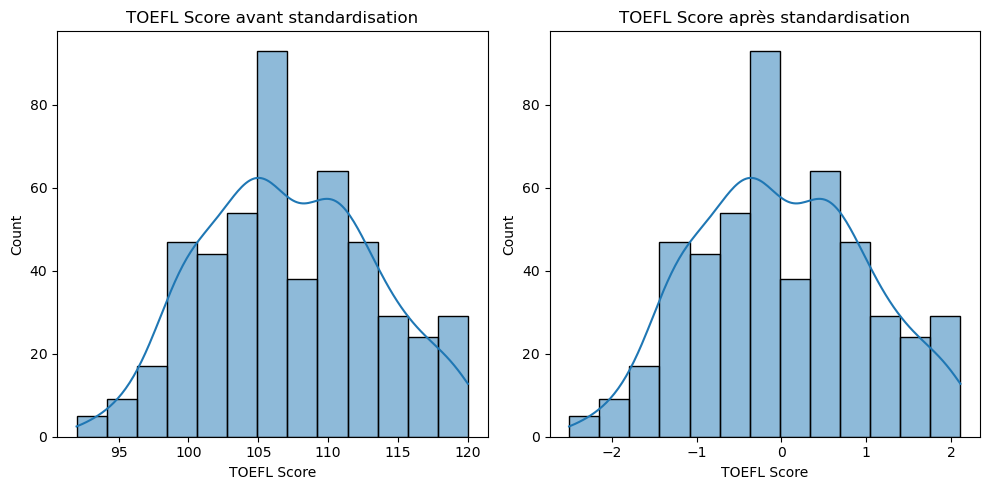

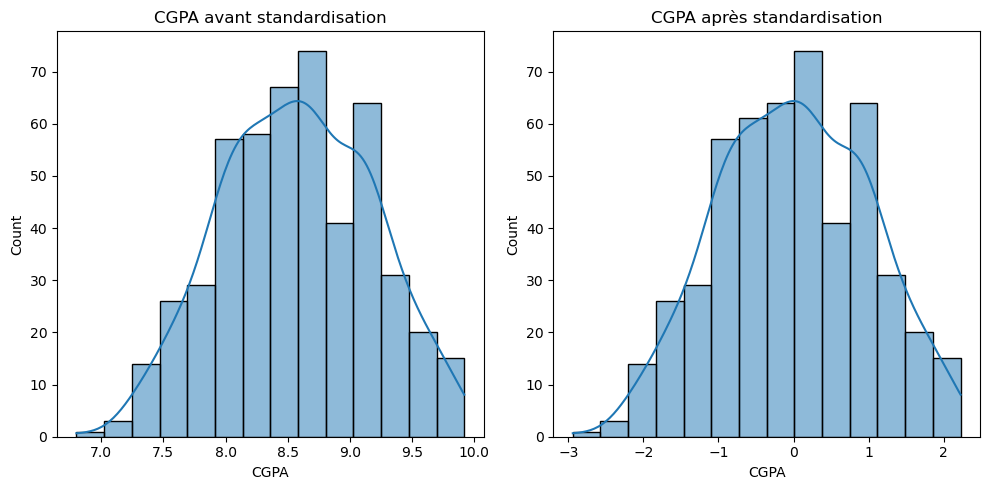

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger le dataset
df = pd.read_csv('admission_data.csv')

# Variables à standardiser
variables_a_standariser = ['GRE Score', 'TOEFL Score', 'CGPA']

# Créer une copie des données avant la standardisation pour comparaison
df_avant_standardisation = df[variables_a_standariser].copy()

# Appliquer la standardisation
scaler = StandardScaler()
df[variables_a_standariser] = scaler.fit_transform(df[variables_a_standariser])

# Comparer les distributions avant et après la standardisation
for var in variables_a_standariser:
    plt.figure(figsize=(10, 5))

    # Distribution avant standardisation
    plt.subplot(1, 2, 1)
    sns.histplot(df_avant_standardisation[var], kde=True)
    plt.title(f'{var} avant standardisation')

    # Distribution après standardisation
    plt.subplot(1, 2, 2)
    sns.histplot(df[var], kde=True)
    plt.title(f'{var} après standardisation')

    plt.tight_layout()
    plt.show()


In [ ]:
## Gérer les valeurs manquantes ou incohérentes (si nécessaire).

In [50]:
import pandas as pd

# Charger le dataset
df = pd.read_csv('admission_data.csv')

# 1. Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# 2. Gérer les valeurs manquantes
# Exemple : supprimer les lignes avec des valeurs manquantes
df = df.dropna()  # Vous pouvez aussi choisir d'imputer les valeurs

# 3. Vérifier les valeurs incohérentes
# Vérifier les valeurs de GRE Score, TOEFL Score, et CGPA
incoherent_values = {
    'GRE Score': df['GRE Score'].max(),
    'TOEFL Score': df['TOEFL Score'].max(),
    'CGPA': df['CGPA'].max()
}

print("\n\nValeurs maximales détectées :")
print(incoherent_values)

# 4. Corriger les valeurs incohérentes
# Exemple : remplacer les valeurs incohérentes par NaN et ensuite supprimer
df.loc[df['GRE Score'] > 1600, 'GRE Score'] = None
df.loc[df['TOEFL Score'] > 120, 'TOEFL Score'] = None
df.loc[df['CGPA'] > 10, 'CGPA'] = None

# Après avoir corrigé, vous pouvez décider de supprimer à nouveau les lignes
df = df.dropna()

# Afficher le DataFrame après nettoyage
print("\n\nDataFrame après gestion des valeurs manquantes et incohérentes :")
print(df.head())


Valeurs manquantes par colonne :
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Valeurs maximales détectées :
{'GRE Score': 340, 'TOEFL Score': 120, 'CGPA': 9.92}


DataFrame après gestion des valeurs manquantes et incohérentes :
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0      337.0        118.0                  4  4.5   4.5  9.65         1   
1      324.0        107.0                  4  4.0   4.5  8.87         1   
2      316.0        104.0                  3  3.0   3.5  8.00         1   
3      322.0        110.0                  3  3.5   2.5  8.67         1   
4      314.0        103.0                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


In [ ]:
# 3.Entraînement des modèles

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset (assurez-vous que le chemin est correct)
df = pd.read_csv('admission_data.csv')

# Variables indépendantes (features) et dépendante (target)
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']

# Séparer les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2. Régression Ridge
ridge_model = Ridge(alpha=1.0)  # alpha est un hyperparamètre
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 3. Régression Lasso
lasso_model = Lasso(alpha=1.0)  # alpha est un hyperparamètre
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# 4. Forêt Aléatoire (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Évaluation des performances
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest']
predictions = [y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_rf]

for model, y_pred in zip(models, predictions):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model} - Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}")


Linear Regression - Mean Squared Error: 0.004, R² Score: 0.819
Ridge Regression - Mean Squared Error: 0.004, R² Score: 0.818
Lasso Regression - Mean Squared Error: 0.015, R² Score: 0.255
Random Forest - Mean Squared Error: 0.004, R² Score: 0.787


In [ ]:
## Analyse et comparaison

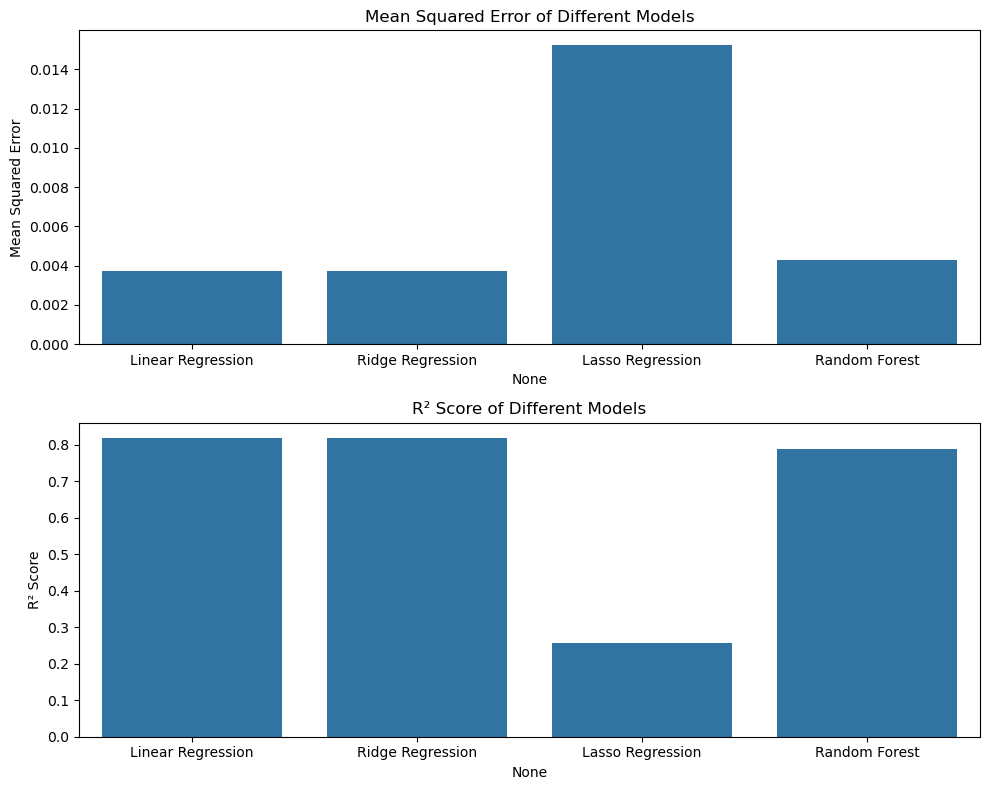

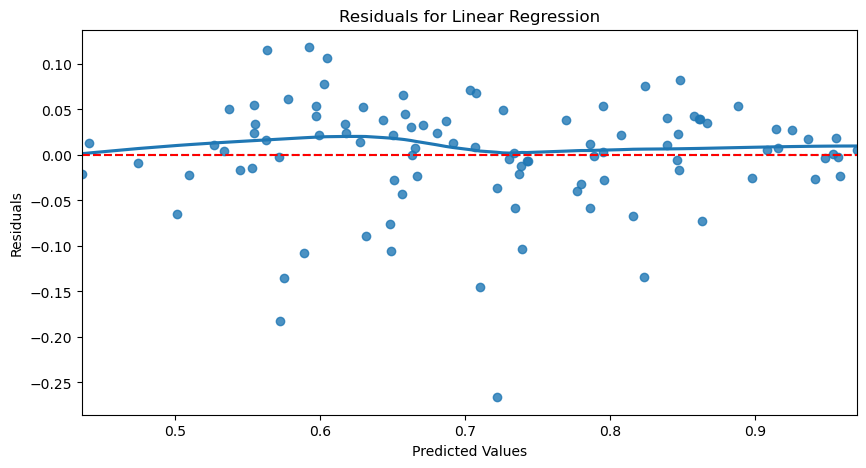

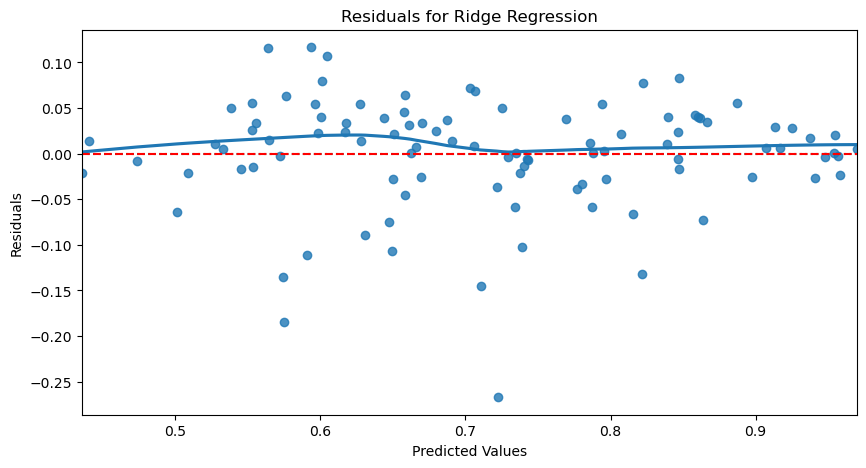

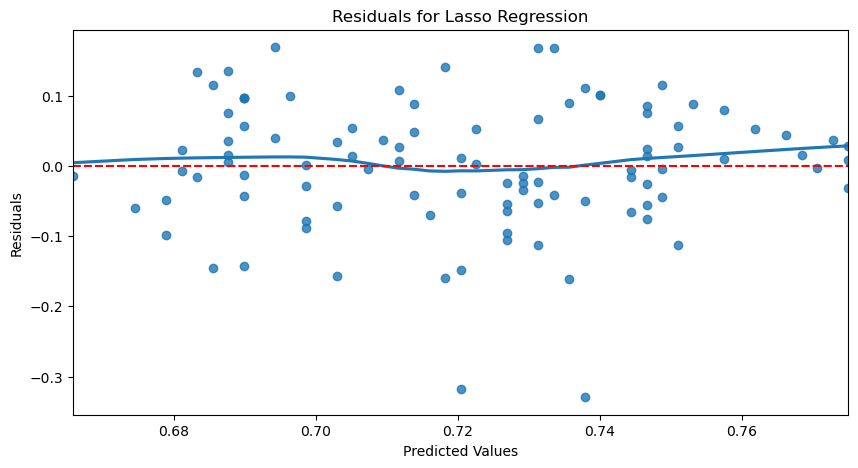

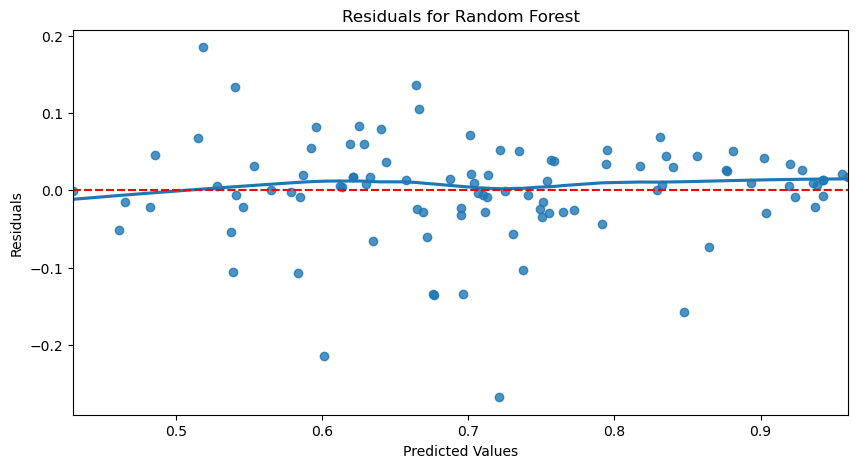

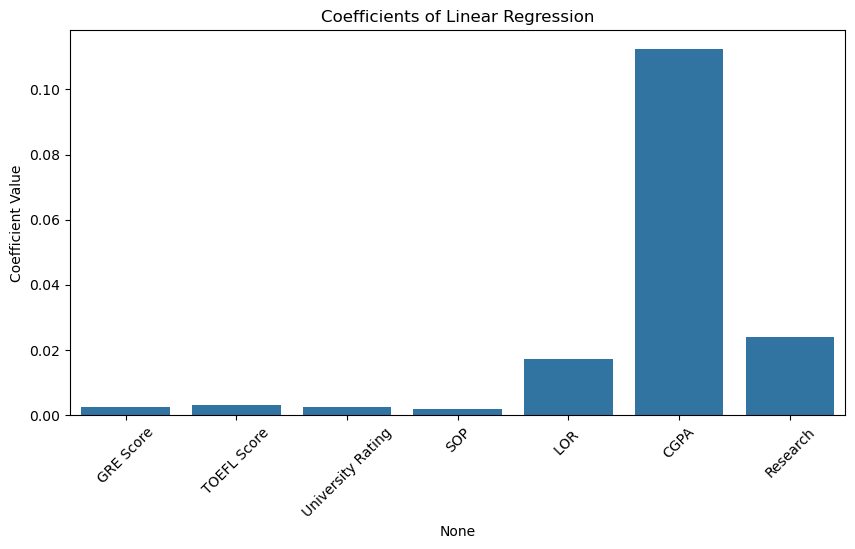

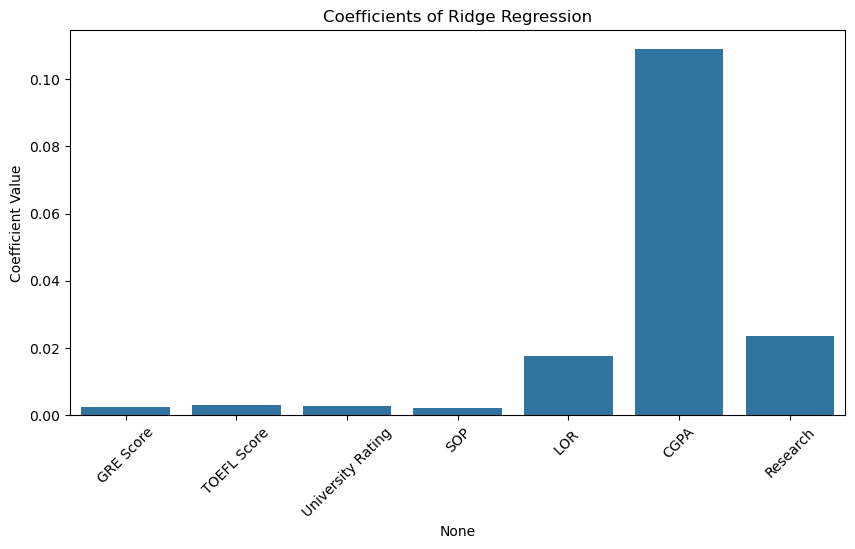

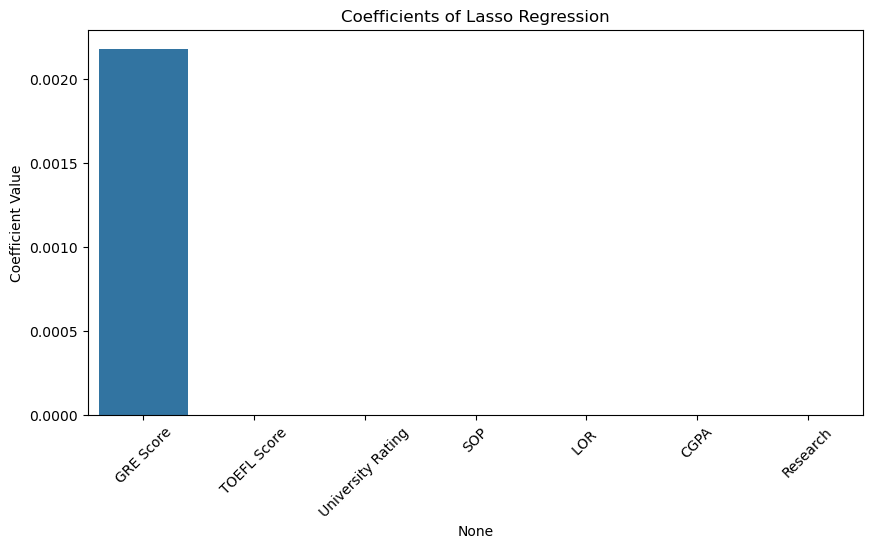

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que df soit votre DataFrame déjà chargé
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor()
}

# Stocker les résultats
results = {}

# Entraîner les modèles et calculer les MSE et R²
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2, "Predictions": y_pred}

# Comparer les MSE et R²
results_df = pd.DataFrame(results).T

# Visualisation des MSE et R²
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# MSE
sns.barplot(x=results_df.index, y='MSE', data=results_df, ax=ax[0])
ax[0].set_title('Mean Squared Error of Different Models')
ax[0].set_ylabel('Mean Squared Error')

# R²
sns.barplot(x=results_df.index, y='R²', data=results_df, ax=ax[1])
ax[1].set_title('R² Score of Different Models')
ax[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

# Visualiser les résidus pour chaque modèle
for name, result in results.items():
    plt.figure(figsize=(10, 5))
    sns.residplot(x=result['Predictions'], y=y_test - result['Predictions'], lowess=True)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f'Residuals for {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Coefficients des modèles linéaires
for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=X.columns, y=model.coef_)
        plt.title(f'Coefficients of {name}')
        plt.ylabel('Coefficient Value')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
# 4.Tuning des hyperparamètres

                                                     Best Parameters  \
Linear Regression                                                N/A   
Ridge Regression                                    {'alpha': 0.001}   
Lasso Regression                                    {'alpha': 0.001}   
Random Forest      {'max_depth': 20, 'max_features': 'sqrt', 'min...   

                  Mean Squared Error      RMSE  R² Score  
Linear Regression           0.003541  0.059504  0.821901  
Ridge Regression            0.003541  0.059504  0.821901  
Lasso Regression            0.003554  0.059618  0.821218  
Random Forest               0.002419  0.049186  0.878309  


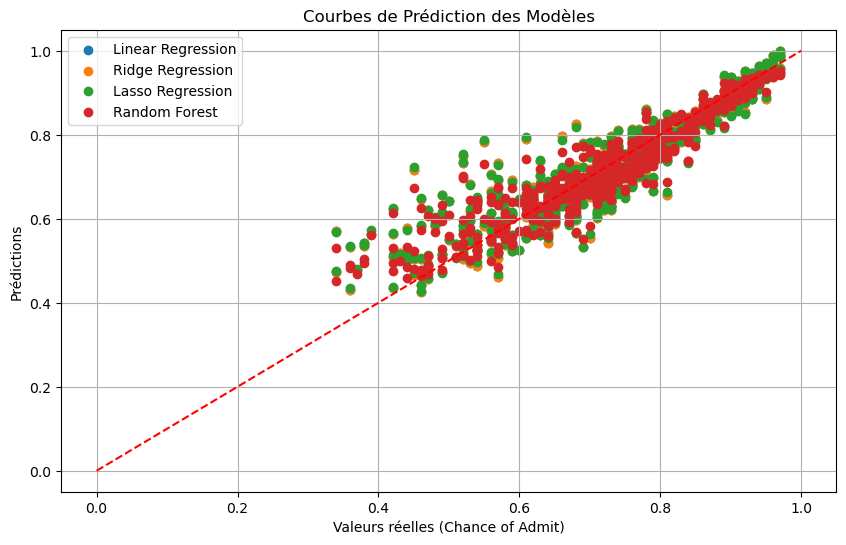

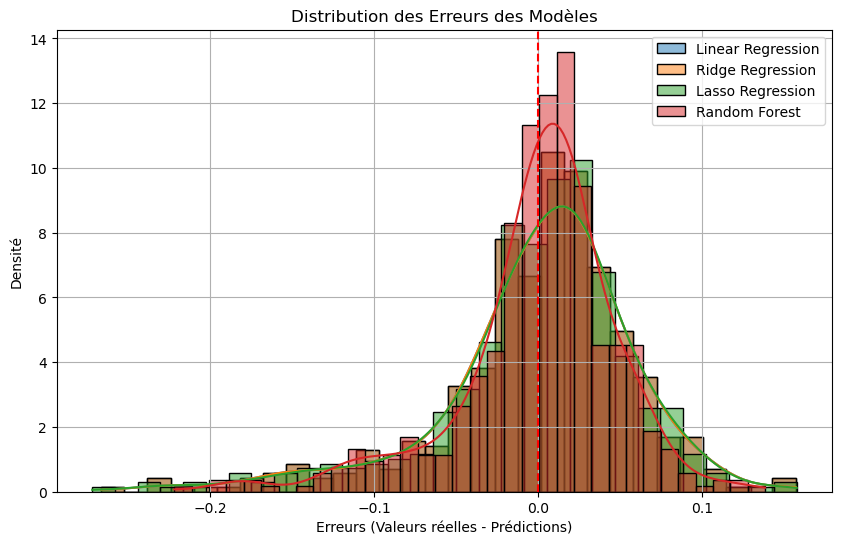

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger le jeu de données
df = pd.read_csv('admission_data.csv')

# Préparer le DataFrame X (features) et y (target)
X = df.drop('Chance of Admit ', axis=1)  # Assurez-vous que cela correspond à votre DataFrame
y = df['Chance of Admit ']

# Définir les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Définir les hyperparamètres à tester
param_grid = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': np.logspace(-3, 3, 7)},
    'Lasso Regression': {'alpha': np.logspace(-3, 3, 7)},
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_features': ['sqrt'],  # Remplacer 'auto' par 'sqrt'
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Stocker les résultats
results = {}

# Effectuer le tuning avec GridSearchCV
for model_name, model in models.items():
    if param_grid[model_name]:  # Vérifier s'il y a des hyperparamètres à tester
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X)
        
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        results[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Mean Squared Error': mse,
            'R² Score': r2,
            'RMSE': np.sqrt(mse),  # Calculer RMSE
            'Predictions': predictions
        }
    else:
        model.fit(X, y)
        predictions = model.predict(X)
        
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        results[model_name] = {
            'Best Parameters': 'N/A',
            'Mean Squared Error': mse,
            'R² Score': r2,
            'RMSE': np.sqrt(mse),  # Calculer RMSE
            'Predictions': predictions
        }

# Afficher les résultats sous forme de tableau récapitulatif
results_df = pd.DataFrame(results).T
print(results_df[['Best Parameters', 'Mean Squared Error', 'RMSE', 'R² Score']])

# Visualiser les résultats
# 1. Courbes de prédiction
plt.figure(figsize=(10, 6))
for model_name, metrics in results.items():
    plt.scatter(y, metrics['Predictions'], label=model_name)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ligne de référence
plt.xlabel('Valeurs réelles (Chance of Admit)')
plt.ylabel('Prédictions')
plt.title('Courbes de Prédiction des Modèles')
plt.legend()
plt.grid()
plt.show()

# 2. Graphique des erreurs
plt.figure(figsize=(10, 6))
for model_name, metrics in results.items():
    errors = y - metrics['Predictions']
    sns.histplot(errors, kde=True, label=model_name, stat='density', alpha=0.5)

plt.xlabel('Erreurs (Valeurs réelles - Prédictions)')
plt.ylabel('Densité')
plt.title('Distribution des Erreurs des Modèles')
plt.axvline(0, color='red', linestyle='--')  # Ligne de référence
plt.legend()
plt.grid()
plt.show()


In [ ]:
# 5.Présentation et analyse des résultats

                                                     Best Parameters  \
Linear Regression                                                N/A   
Ridge Regression                                    {'alpha': 0.001}   
Lasso Regression                                    {'alpha': 0.001}   
Random Forest      {'max_depth': None, 'max_features': 'sqrt', 'm...   

                  Mean Squared Error      RMSE  R² Score  
Linear Regression           0.003541  0.059504  0.821901  
Ridge Regression            0.003541  0.059504  0.821901  
Lasso Regression            0.003554  0.059618  0.821218  
Random Forest                0.00234  0.048376  0.882288  


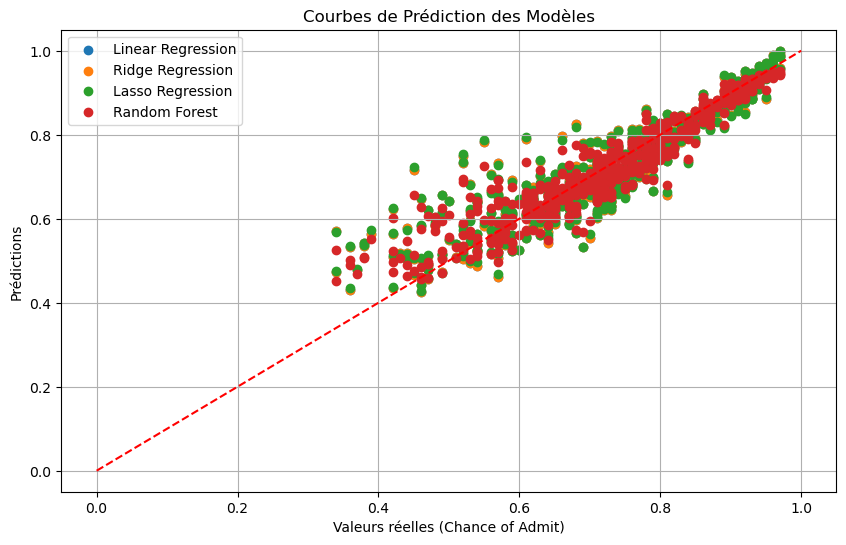

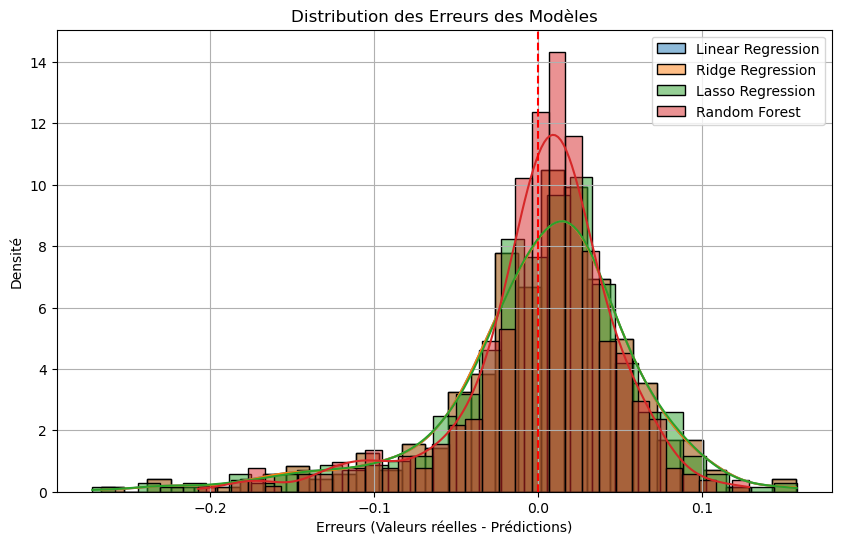

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger le jeu de données
df = pd.read_csv('admission_data.csv')

# Préparer le DataFrame X (features) et y (target)
X = df.drop('Chance of Admit ', axis=1)  # Assurez-vous que cela correspond à votre DataFrame
y = df['Chance of Admit ']

# Définir les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Définir les hyperparamètres à tester
param_grid = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': np.logspace(-3, 3, 7)},
    'Lasso Regression': {'alpha': np.logspace(-3, 3, 7)},
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_features': ['sqrt', 'log2'],  # Mise à jour ici
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Stocker les résultats
results = {}

# Effectuer le tuning avec GridSearchCV
for model_name, model in models.items():
    if param_grid[model_name]:  # Vérifier s'il y a des hyperparamètres à tester
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X)
        
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        results[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Mean Squared Error': mse,
            'R² Score': r2,
            'RMSE': np.sqrt(mse),  # Calculer RMSE
            'Predictions': predictions
        }
    else:
        model.fit(X, y)
        predictions = model.predict(X)
        
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        results[model_name] = {
            'Best Parameters': 'N/A',
            'Mean Squared Error': mse,
            'R² Score': r2,
            'RMSE': np.sqrt(mse),  # Calculer RMSE
            'Predictions': predictions
        }

# Afficher les résultats sous forme de tableau récapitulatif
results_df = pd.DataFrame(results).T
print(results_df[['Best Parameters', 'Mean Squared Error', 'RMSE', 'R² Score']])

# Visualiser les résultats
# 1. Courbes de prédiction
plt.figure(figsize=(10, 6))
for model_name, metrics in results.items():
    plt.scatter(y, metrics['Predictions'], label=model_name)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ligne de référence
plt.xlabel('Valeurs réelles (Chance of Admit)')
plt.ylabel('Prédictions')
plt.title('Courbes de Prédiction des Modèles')
plt.legend()
plt.grid()
plt.show()

# 2. Graphique des erreurs
plt.figure(figsize=(10, 6))
for model_name, metrics in results.items():
    errors = y - metrics['Predictions']
    sns.histplot(errors, kde=True, label=model_name, stat='density', alpha=0.5)

plt.xlabel('Erreurs (Valeurs réelles - Prédictions)')
plt.ylabel('Densité')
plt.title('Distribution des Erreurs des Modèles')
plt.axvline(0, color='red', linestyle='--')  # Ligne de référence
plt.legend()
plt.grid()
plt.show()
